In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Traffic_Sign_Dataset.zip.zip to Traffic_Sign_Dataset.zip.zip


In [ ]:
import zipfile

zip_path = '/content/Traffic_Sign_Dataset.zip.zip'  # match exact name
extract_path = '/content/traffic_sign_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)


✅ Dataset extracted to: /content/traffic_sign_dataset


In [ ]:
!ls /content/traffic_sign_dataset


labels.csv  traffic_Data


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
import pandas as pd

df = pd.read_csv('/content/traffic_sign_dataset/labels.csv')
print(df.columns)
df.head()


Index(['ClassId', 'Name'], dtype='object')


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Paths
img_folder = '/content/traffic_sign_dataset/traffic_Data'
label_map_csv = '/content/traffic_sign_dataset/labels.csv'

# Load label name mapping
label_df = pd.read_csv(label_map_csv)
id_to_name = dict(zip(label_df['ClassId'], label_df['Name']))

images = []
labels = []

# Load images and labels
for img_name in os.listdir(img_folder):
    try:
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))

        # Extract class ID from filename (e.g. "4_23.png" -> 4)
        class_id = int(img_name.split('_')[0])
        label = id_to_name[class_id]

        images.append(img)
        labels.append(label)
    except:
        continue

images = np.array(images) / 255.0
labels = np.array(labels)


In [ ]:
import os

img_folder = '/content/traffic_sign_dataset/traffic_Data'
print("Number of files:", len(os.listdir(img_folder)))
print("Example filenames:", os.listdir(img_folder)[:5])


Number of files: 2
Example filenames: ['TEST', 'DATA']


In [ ]:
import os

subfolders = os.listdir(img_folder)
print("Subfolders in traffic_Data:", subfolders)

for sub in subfolders:
    sub_path = os.path.join(img_folder, sub)
    print(f"📁 Contents of {sub}:")
    print(os.listdir(sub_path)[:5])  # show first 5 files


Subfolders in traffic_Data: ['TEST', 'DATA']
📁 Contents of TEST:
['026_0015_j.png', '011_0015_j.png', '004_0026_j.png', '043_0055.png', '047_1_0002_1_j.png']
📁 Contents of DATA:
['24', '39', '29', '5', '11']


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# Paths
img_root = '/content/traffic_sign_dataset/traffic_Data'
label_map_csv = '/content/traffic_sign_dataset/labels.csv'

# Load ClassId → Name mapping
label_df = pd.read_csv(label_map_csv)
id_to_name = dict(zip(label_df['ClassId'], label_df['Name']))

images = []
labels = []

# --- Load from DATA ---
data_folder = os.path.join(img_root, 'DATA')
for class_id in os.listdir(data_folder):
    class_folder = os.path.join(data_folder, class_id)
    if not os.path.isdir(class_folder):
        continue
    for img_name in os.listdir(class_folder):
        try:
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (64, 64))
            label = id_to_name[int(class_id)]
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"⚠️ DATA ERROR: {e}")

# --- Load from TEST ---
test_folder = os.path.join(img_root, 'TEST')
for img_name in os.listdir(test_folder):
    try:
        img_path = os.path.join(test_folder, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (64, 64))
        class_id = int(img_name.split('_')[0])
        label = id_to_name[class_id]
        images.append(img)
        labels.append(label)
    except Exception as e:
        print(f"⚠️ TEST ERROR: {e}")

images = np.array(images) / 255.0
labels = np.array(labels)

print(f"✅ Loaded {len(images)} images.")


✅ Loaded 6164 images.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Encode labels (e.g. "Speed limit" → 0, 1, 2, ...)
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Convert to categorical (one-hot encoding)
labels_cat = to_categorical(labels_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_cat, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (4931, 64, 64, 3)
Test set size: (1233, 64, 64, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 55)             │         7,095 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,632,247 (6.23 MB)

 Trainable params: 1,632,247 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 29s 169ms/step - accuracy: 0.2267 - loss: 3.1979 - val_accuracy: 0.6740 - val_loss: 1.2810
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 27s 176ms/step - accuracy: 0.6344 - loss: 1.3263 - val_accuracy: 0.8435 - val_loss: 0.6487
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - accuracy: 0.7803 - loss: 0.7418 - val_accuracy: 0.8954 - val_loss: 0.3659
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.8280 - loss: 0.5395 - val_accuracy: 0.9489 - val_loss: 0.2208
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.8829 - loss: 0.3788 - val_accuracy: 0.9586 - val_loss: 0.1591
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 42s 175ms/step - accuracy: 0.9165 - loss: 0.2751 - val_accuracy: 0.9732 - val_loss: 0.1149
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.9334 - loss: 0.2247 - val_accuracy: 0.9716 - val_loss: 0.1152
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 166ms/step - accuracy: 0.9343 - loss: 0

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9846 - loss: 0.0699
Test Accuracy: 98.05%


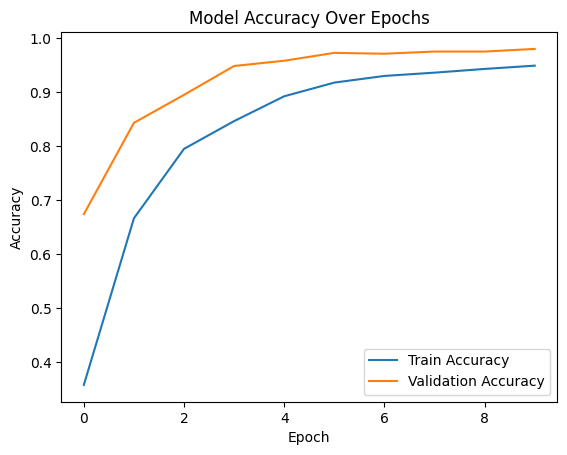

In [ ]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save("traffic_sign_model.h5")
print("✅ Model saved as traffic_sign_model.h5")


✅ Model saved as traffic_sign_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step


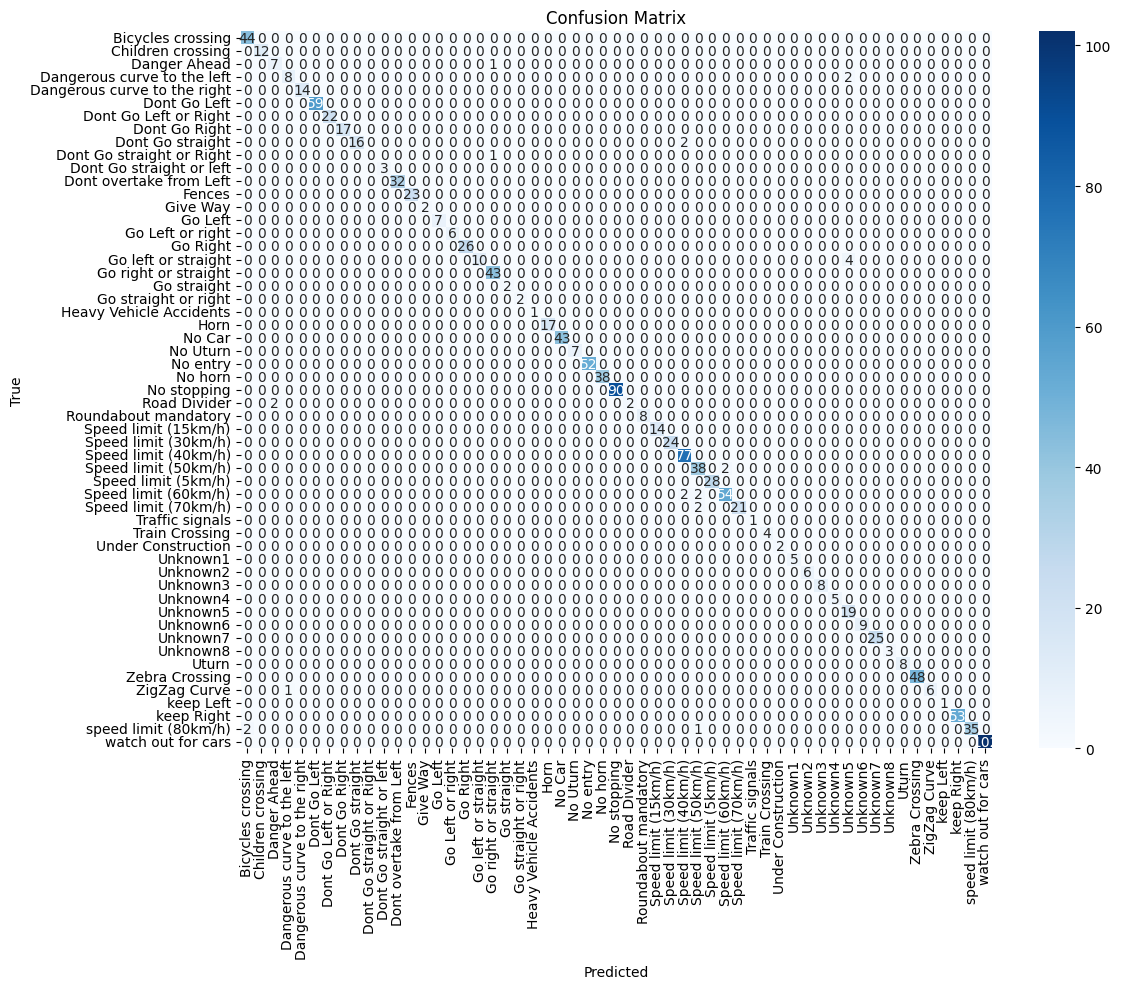


Classification Report:

                              precision    recall  f1-score   support

           Bicycles crossing       0.96      1.00      0.98        44
           Children crossing       1.00      1.00      1.00        12
                Danger Ahead       0.78      0.88      0.82         8
 Dangerous curve to the left       0.89      0.80      0.84        10
Dangerous curve to the right       1.00      1.00      1.00        14
                Dont Go Left       1.00      1.00      1.00        59
       Dont Go Left or Right       1.00      1.00      1.00        22
               Dont Go Right       1.00      1.00      1.00        17
            Dont Go straight       1.00      0.89      0.94        18
   Dont Go straight or Right       0.00      0.00      0.00         1
    Dont Go straight or left       1.00      1.00      1.00         3
     Dont overtake from Left       1.00      1.00      1.00        32
                      Fences       1.00      1.00      1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))


In [ ]:
def predict_single_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = le.inverse_transform([np.argmax(prediction)])
    print(f"🔎 Predicted Traffic Sign: {predicted_class[0]}")

# Example:
predict_single_image("/content/traffic_sign_dataset/traffic_Data/TEST/004_0026_j.png")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
🔎 Predicted Traffic Sign: Speed limit (50km/h)


In [ ]:
!pip install matplotlib opencv-python


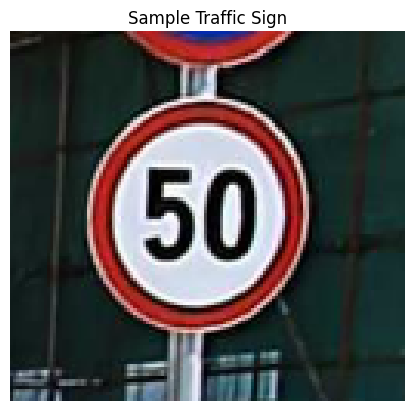

In [ ]:
import matplotlib.pyplot as plt
import cv2

img_path = '/content/traffic_sign_dataset/traffic_Data/TEST/004_0026_j.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB

plt.imshow(img)
plt.title("Sample Traffic Sign")
plt.axis('off')
plt.show()


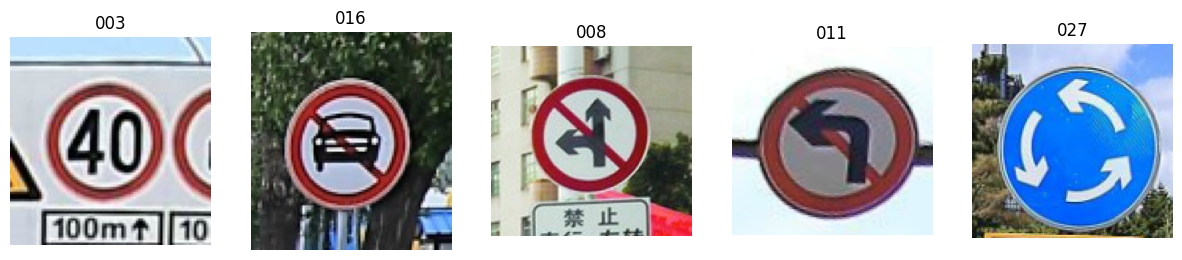

In [ ]:
import random

folder = '/content/traffic_sign_dataset/traffic_Data/TEST'
sample_files = random.sample(os.listdir(folder), 5)

plt.figure(figsize=(15, 3))
for i, fname in enumerate(sample_files):
    img_path = os.path.join(folder, fname)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(fname.split("_")[0])  # show class id
    plt.axis('off')
plt.show()


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Random rotation
    width_shift_range=0.2,  # Random width shift
    height_shift_range=0.2,  # Random height shift
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Use this generator during training
model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 82s 523ms/step - accuracy: 0.0749 - loss: 3.7080 - val_accuracy: 0.0843 - val_loss: 3.7805
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 79s 510ms/step - accuracy: 0.0795 - loss: 3.6150 - val_accuracy: 0.1249 - val_loss: 3.6140
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 79s 507ms/step - accuracy: 0.0761 - loss: 3.6060 - val_accuracy: 0.0860 - val_loss: 3.6056
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 80s 495ms/step - accuracy: 0.0774 - loss: 3.6034 - val_accuracy: 0.0876 - val_loss: 3.4917
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 77s 495ms/step - accuracy: 0.0835 - loss: 3.5893 - val_accuracy: 0.0965 - val_loss: 3.5197
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 77s 494ms/step - accuracy: 0.0821 - loss: 3.5833 - val_accuracy: 0.0876 - val_loss: 3.5481
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 77s 494ms/step - accuracy: 0.0856 - loss: 3.5723 - val_accuracy: 0.0868 - val_loss: 3.5300
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 77s 495ms/step - accuracy: 0.0812 - loss: 3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stop, checkpoint])


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.3043 - loss: 2.5805

155/155 ━━━━━━━━━━━━━━━━━━━━ 80s 495ms/step - accuracy: 0.3050 - loss: 2.5774 - val_accuracy: 0.6780 - val_loss: 1.1079
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.6862 - loss: 1.0890

155/155 ━━━━━━━━━━━━━━━━━━━━ 79s 486ms/step - accuracy: 0.6865 - loss: 1.0880 - val_accuracy: 0.8646 - val_loss: 0.5204
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8399 - loss: 0.5650

155/155 ━━━━━━━━━━━━━━━━━━━━ 82s 486ms/step - accuracy: 0.8399 - loss: 0.5647 - val_accuracy: 0.9351 - val_loss: 0.2748
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8971 - loss: 0.3347

155/155 ━━━━━━━━━━━━━━━━━━━━ 82s 484ms/step - accuracy: 0.8971 - loss: 0.3346 - val_accuracy: 0.9513 - val_loss: 0.1712
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.9125 - loss: 0.3137

155/155 ━━━━━━━━━━━━━━━━━━━━ 82s 483ms/step - accuracy: 0.9125 - loss: 0.3134 - val_accuracy: 0.9724 - val_loss: 0.1143
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.9320 - loss: 0.1984

155/155 ━━━━━━━━━━━━━━━━━━━━ 82s 483ms/step - accuracy: 0.9320 - loss: 0.1983 - val_accuracy: 0.9773 - val_loss: 0.0988
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.9540 - loss: 0.1350

155/155 ━━━━━━━━━━━━━━━━━━━━ 81s 480ms/step - accuracy: 0.9540 - loss: 0.1351 - val_accuracy: 0.9813 - val_loss: 0.0817
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9677 - loss: 0.1052

155/155 ━━━━━━━━━━━━━━━━━━━━ 80s 466ms/step - accuracy: 0.9677 - loss: 0.1052 - val_accuracy: 0.9854 - val_loss: 0.0714
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.9689 - loss: 0.1031

155/155 ━━━━━━━━━━━━━━━━━━━━ 74s 478ms/step - accuracy: 0.9689 - loss: 0.1031 - val_accuracy: 0.9870 - val_loss: 0.0610
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9636 - loss: 0.1072

155/155 ━━━━━━━━━━━━━━━━━━━━ 80s 468ms/step - accuracy: 0.9636 - loss: 0.1071 - val_accuracy: 0.9870 - val_loss: 0.0590


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # or any value you test

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set hyperparameters
learning_rate = 0.001
dropout_rate = 0.5

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(dropout_rate),
    Dense(len(le.classes_), activation='softmax')
])

# Compile with Adam optimizer and custom learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.1274 - loss: 3.5665 - val_accuracy: 0.3844 - val_loss: 2.2515
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 45s 253ms/step - accuracy: 0.4187 - loss: 2.1290 - val_accuracy: 0.6707 - val_loss: 1.1843
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 32s 197ms/step - accuracy: 0.5851 - loss: 1.4113 - val_accuracy: 0.7924 - val_loss: 0.8141
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 42s 205ms/step - accuracy: 0.6796 - loss: 1.0310 - val_accuracy: 0.8427 - val_loss: 0.5631
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.7612 - loss: 0.7448 - val_accuracy: 0.8986 - val_loss: 0.4225
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.8011 - loss: 0.5983 - val_accuracy: 0.9019 - val_loss: 0.3006
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.8390 - loss: 0.4754 - val_accuracy: 0.9424 - val_loss: 0.2303
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.8576 - loss: 0

In [ ]:
param_sets = [
    {"lr": 0.001, "dropout": 0.5},
    {"lr": 0.0005, "dropout": 0.5},
    {"lr": 0.001, "dropout": 0.3},
]

for i, params in enumerate(param_sets):
    print(f"\n🔁 Training model {i+1} with lr={params['lr']}, dropout={params['dropout']}")

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(params['dropout']),
        Dense(len(le.classes_), activation='softmax')
    ])

    optimizer = Adam(learning_rate=params['lr'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=10, batch_size=32, verbose=0)

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Test Accuracy: {acc*100:.2f}%")



🔁 Training model 1 with lr=0.001, dropout=0.5
✅ Test Accuracy: 96.84%

🔁 Training model 2 with lr=0.0005, dropout=0.5
✅ Test Accuracy: 95.78%

🔁 Training model 3 with lr=0.001, dropout=0.3
✅ Test Accuracy: 98.54%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define hyperparameter sets to test
param_sets = [
    {"lr": 0.001, "dropout": 0.5},
    {"lr": 0.0005, "dropout": 0.5},
    {"lr": 0.001, "dropout": 0.3},
]

best_accuracy = 0
best_model = None
best_params = {}

for i, params in enumerate(param_sets):
    print(f"\n🔁 Training model {i+1} with lr={params['lr']}, dropout={params['dropout']}")

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(params['dropout']),
        Dense(len(le.classes_), activation='softmax')
    ])

    optimizer = Adam(learning_rate=params['lr'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=10, batch_size=32, verbose=0)

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Model {i+1} Accuracy: {acc*100:.2f}%")

    # Save best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_params = params

# Save the best model
best_model.save("best_traffic_sign_model.h5")
print(f"\n🏆 Best model saved with accuracy: {best_accuracy*100:.2f}%")
print(f"📌 Best Hyperparameters: Learning Rate = {best_params['lr']}, Dropout = {best_params['dropout']}")



🔁 Training model 1 with lr=0.001, dropout=0.5
✅ Model 1 Accuracy: 97.57%

🔁 Training model 2 with lr=0.0005, dropout=0.5
✅ Model 2 Accuracy: 97.97%

🔁 Training model 3 with lr=0.001, dropout=0.3


✅ Model 3 Accuracy: 98.22%

🏆 Best model saved with accuracy: 98.22%
📌 Best Hyperparameters: Learning Rate = 0.001, Dropout = 0.3


In [ ]:
# ✅ 1. Install dependencies (if needed)
!pip install -q matplotlib scikit-learn

# ✅ 2. Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ✅ 3. Define paths
zip_path = "/content/Traffic_Sign_Dataset.zip.zip"
extract_path = "/content/traffic_sign_dataset"

# ✅ 4. Unzip the dataset
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# ✅ 5. Dataset structure
data_dir = os.path.join(extract_path, "traffic_Data", "DATA")
test_dir = os.path.join(extract_path, "traffic_Data", "TEST")

# ✅ 6. Load and preprocess dataset
IMG_SIZE = 64
images = []
labels = []

for class_id in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, class_id)
    if os.path.isdir(class_folder):
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            try:
                img = cv2.imread(image_path)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(class_id)
            except:
                continue

#  7. Convert to NumPy arrays and normalize
images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels)

#  8. Encode labels and one-hot encode
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_cat = to_categorical(labels_encoded)

#  9. Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels_cat, test_size=0.2, random_state=42)

#  10. Check shape
print("Training Samples:", X_train.shape)
print("Testing Samples:", X_test.shape)
print("Number of Classes:", len(label_encoder.classes_))


Training Samples: (3336, 64, 64, 3)
Testing Samples: (834, 64, 64, 3)
Number of Classes: 58


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.3155 - loss: 3.0423 - val_accuracy: 0.6343 - val_loss: 1.3376
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.8319 - loss: 0.7499 - val_accuracy: 0.8777 - val_loss: 0.5334
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.9384 - loss: 0.2647 - val_accuracy: 0.9101 - val_loss: 0.3512
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.9774 - loss: 0.1108 - val_accuracy: 0.9520 - val_loss: 0.2473
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.9946 - loss: 0.0450 - val_accuracy: 0.9580 - val_loss: 0.2271
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.9973 - loss: 0.0286 - val_accuracy: 0.9616 - val_loss: 0.1942
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.9987 - loss: 0.0161 - val_accuracy: 0.9568 - val_loss: 0.1719
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 1.0000 - loss: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

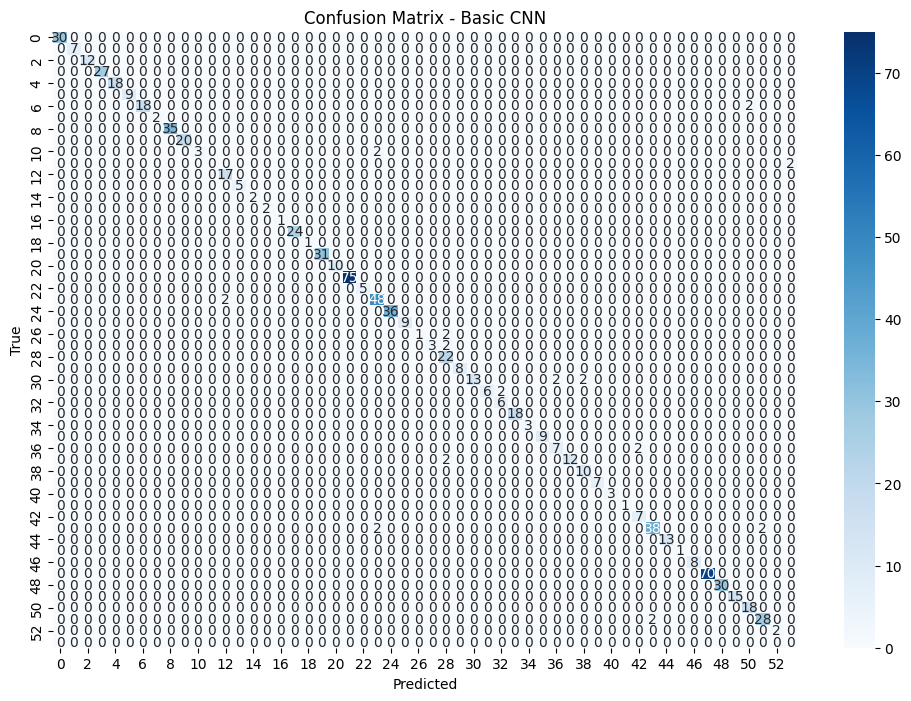

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#  Define basic CNN model
def build_cnn_basic(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# ✅ Build and compile
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

cnn_basic = build_cnn_basic(input_shape, num_classes)
cnn_basic.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history_basic = cnn_basic.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# ✅ Evaluate performance
y_pred_basic = cnn_basic.predict(X_test)
y_pred_classes_basic = np.argmax(y_pred_basic, axis=1)
y_true = np.argmax(y_test, axis=1)

# ✅ Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes_basic))

# ✅ Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_true, y_pred_classes_basic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Basic CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
def create_basic_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
105/105 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.2011 - loss: 3.3495 - val_accuracy: 0.5600 - val_loss: 1.6787
Epoch 2/12
105/105 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5844 - loss: 1.4919 - val_accuracy: 0.8297 - val_loss: 0.7651
Epoch 3/12
105/105 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.8064 - loss: 0.7106 - val_accuracy: 0.8957 - val_loss: 0.3877
Epoch 4/12
105/105 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8870 - loss: 0.3931 - val_accuracy: 0.9388 - val_loss: 0.2389
Epoch 5/12
105/105 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9143 - loss: 0.2803 - val_accuracy: 0.9640 - val_loss: 0.1682
Epoch 6/12
105/105 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9469 - loss: 0.1855 - val_accuracy: 0.9700 - val_loss: 0.1283
Epoch 7/12
105/105 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9675 - loss: 0.1328 - val_accuracy: 0.9676 - val_loss: 0.1385
Epoch 8/12
105/105 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9787 - loss: 0.0773 - val_accu

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


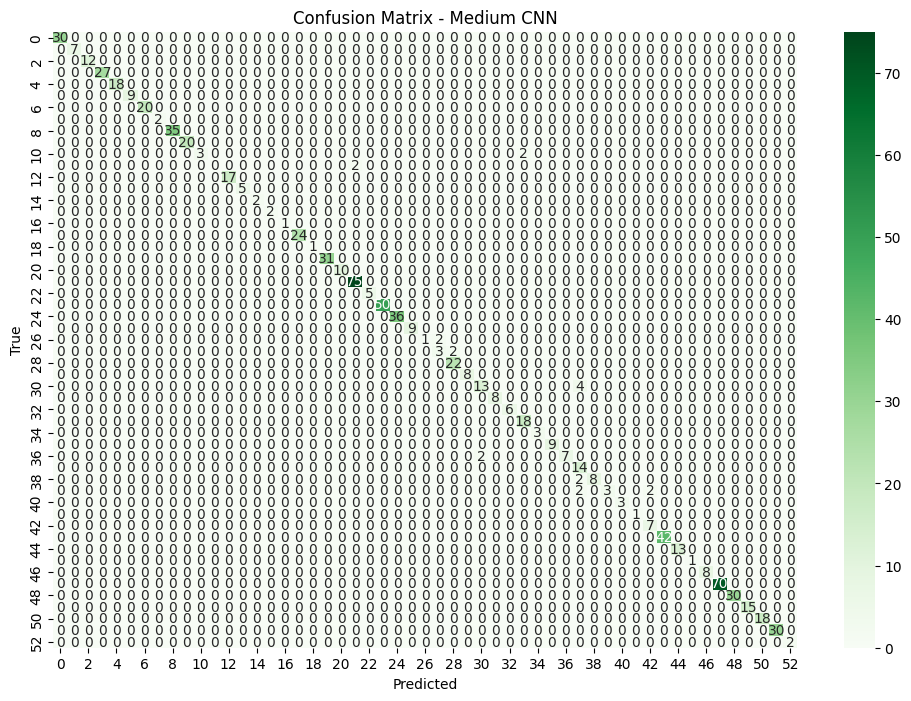

In [ ]:
from tensorflow.keras.layers import Dropout

# ✅ Define medium CNN model
def build_cnn_medium(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# ✅ Build and compile
cnn_medium = build_cnn_medium(input_shape, num_classes)
cnn_medium.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history_medium = cnn_medium.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test), batch_size=32)

# ✅ Evaluate performance
y_pred_medium = cnn_medium.predict(X_test)
y_pred_classes_medium = np.argmax(y_pred_medium, axis=1)

# ✅ Classification Report
print("Classification Report - Medium CNN:\n")
print(classification_report(y_true, y_pred_classes_medium))

# ✅ Confusion Matrix
plt.figure(figsize=(12, 8))
cm_medium = confusion_matrix(y_true, y_pred_classes_medium)
sns.heatmap(cm_medium, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Medium CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.2564 - loss: 5.0393 - val_accuracy: 0.0300 - val_loss: 16.3636
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5812 - loss: 1.5560 - val_accuracy: 0.0300 - val_loss: 15.8636
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 137s 993ms/step - accuracy: 0.7170 - loss: 0.9618 - val_accuracy: 0.3141 - val_loss: 4.1869
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 104s 995ms/step - accuracy: 0.8251 - loss: 0.5996 - val_accuracy: 0.6475 - val_loss: 1.9558
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 141s 989ms/step - accuracy: 0.8652 - loss: 0.4003 - val_accuracy: 0.8417 - val_loss: 0.6919
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 142s 990ms/step - accuracy: 0.9093 - loss: 0.2512 - val_accuracy: 0.9412 - val_loss: 0.1991
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9264 - loss: 0.2341 - val_accuracy: 0.9616 - val_loss: 0.1568
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 104s 991ms/step - accuracy: 0.9332 - loss: 

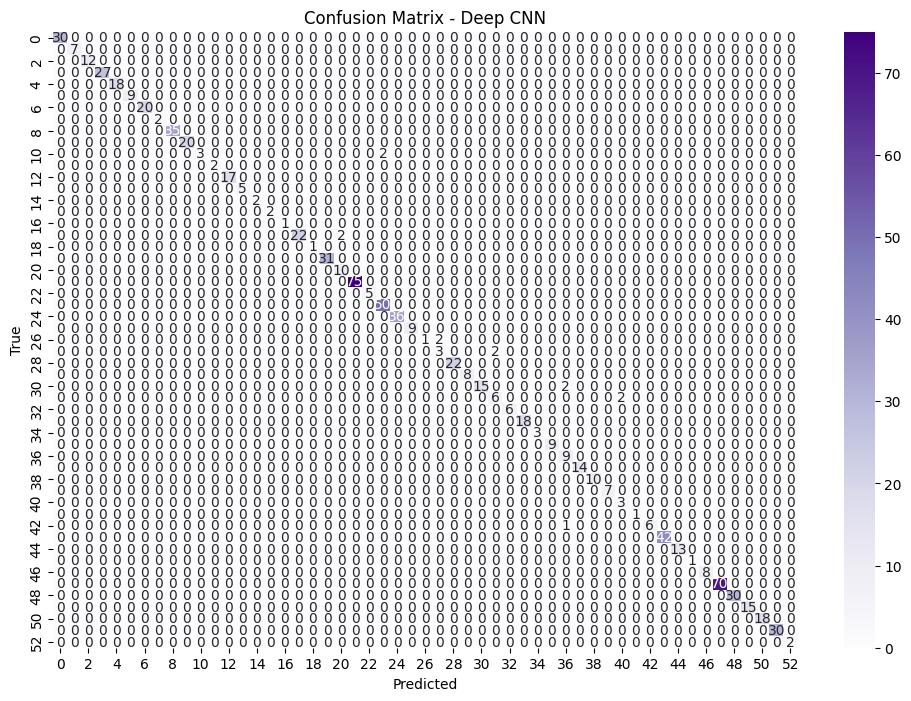

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# ✅ Define deep CNN model
def build_cnn_deep(input_shape, num_classes):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Dense
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# ✅ Build and compile
cnn_deep = build_cnn_deep(input_shape, num_classes)
cnn_deep.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history_deep = cnn_deep.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)

# ✅ Evaluate performance
y_pred_deep = cnn_deep.predict(X_test)
y_pred_classes_deep = np.argmax(y_pred_deep, axis=1)

# ✅ Classification Report
print("Classification Report - Deep CNN:\n")
print(classification_report(y_true, y_pred_classes_deep))

# ✅ Confusion Matrix
plt.figure(figsize=(12, 8))
cm_deep = confusion_matrix(y_true, y_pred_classes_deep)
sns.heatmap(cm_deep, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Deep CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
def create_basic_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_medium_model(num_classes):
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# ... (other functions remain the same)

def create_deep_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        # The following block is modified to prevent the error
        # Reduced kernel size and removed unnecessary MaxPooling2D
        Conv2D(256, (2, 2), activation='relu', padding='same'), # reduced kernel size to (2,2)
        #MaxPooling2D((2, 2)), removed excessive downsampling
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Training Basic CNN...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.3204 - loss: 1.8629 - val_accuracy: 0.5017 - val_loss: 1.3835
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5298 - loss: 1.3314 - val_accuracy: 0.5639 - val_loss: 1.2397
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5773 - loss: 1.2042 - val_accuracy: 0.5806 - val_loss: 1.2013
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6025 - loss: 1.1356 - val_accuracy: 0.5997 - val_loss: 1.1436
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6236 - loss: 1.0728 - val_accuracy: 0.6030 - val_loss: 1.1403
Basic CNN Accuracy: 0.6030, Loss: 1.1403, Time: 211.16s

Training Medium CNN...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 120ms/step - accuracy: 0.3801 - loss: 1.7039 - val_accuracy: 0.5774 - val_loss: 1.1892
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 116ms/step - accuracy: 0.6094 - loss: 1.1197 - val_accuracy: 0.6509 - val_loss

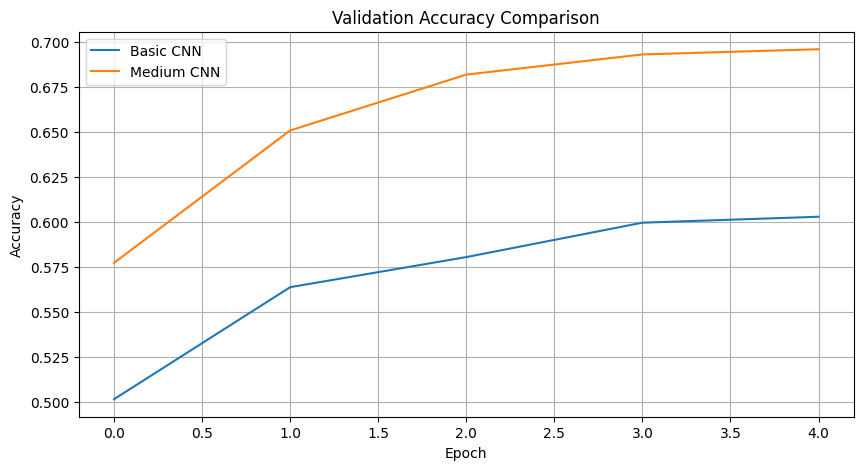

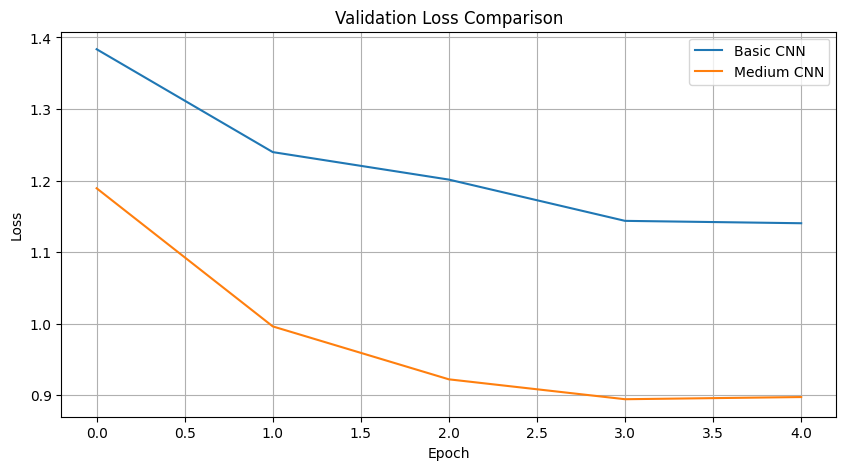

In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Define Basic CNN
def create_basic_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define Medium CNN
def create_medium_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load & preprocess CIFAR-10 (you can replace with your dataset)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Training function
def train_model(model, name):
    print(f"\nTraining {name}...")
    start = time.time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    end = time.time()
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} Accuracy: {accuracy:.4f}, Loss: {loss:.4f}, Time: {end - start:.2f}s")
    return history, accuracy, loss

# Create and train both models
basic_model = create_basic_model(num_classes)
medium_model = create_medium_model(num_classes)

basic_history, basic_acc, basic_loss = train_model(basic_model, "Basic CNN")
medium_history, medium_acc, medium_loss = train_model(medium_model, "Medium CNN")

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(basic_history.history['val_accuracy'], label='Basic CNN')
plt.plot(medium_history.history['val_accuracy'], label='Medium CNN')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(basic_history.history['val_loss'], label='Basic CNN')
plt.plot(medium_history.history['val_loss'], label='Medium CNN')
plt.title("Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



Training Basic CNN...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.3869 - loss: 1.6991 - val_accuracy: 0.5364 - val_loss: 1.2928
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5733 - loss: 1.2173 - val_accuracy: 0.5839 - val_loss: 1.1744
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.6183 - loss: 1.0833 - val_accuracy: 0.5997 - val_loss: 1.1245
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.6564 - loss: 0.9824 - val_accuracy: 0.6365 - val_loss: 1.0333
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.6836 - loss: 0.9030 - val_accuracy: 0.6338 - val_loss: 1.0342
Basic CNN Accuracy: 0.6338, Loss: 1.0342, Time: 371.76s

Training Deep CNN...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 238ms/step - accuracy: 0.3561 - loss: 1.7269 - val_accuracy: 0.5971 - val_loss: 1.1247
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 183s 233ms/step - accuracy: 0.6342 - loss: 1.0216 - val_accuracy: 0.6764 - val_loss:

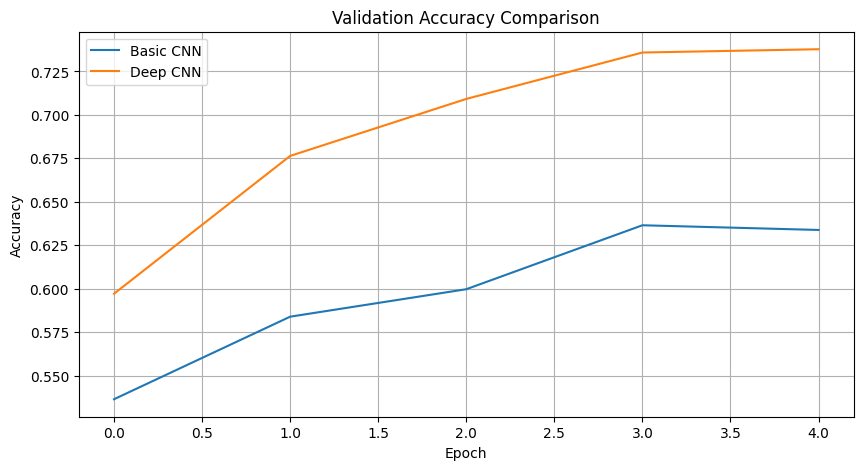

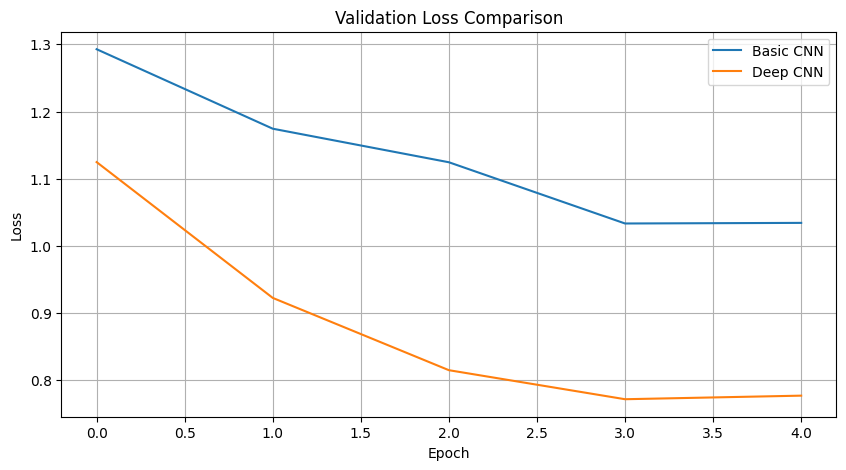

In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Basic CNN Model
def create_basic_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Deep CNN Model (with padding to avoid dimension errors)
def create_deep_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Train function
def train_model(model, name):
    print(f"\nTraining {name}...")
    start = time.time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    end = time.time()
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} Accuracy: {accuracy:.4f}, Loss: {loss:.4f}, Time: {end - start:.2f}s")
    return history, accuracy, loss

# Create and train models
basic_model = create_basic_model(num_classes)
deep_model = create_deep_model(num_classes)

basic_history, basic_acc, basic_loss = train_model(basic_model, "Basic CNN")
deep_history, deep_acc, deep_loss = train_model(deep_model, "Deep CNN")

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(basic_history.history['val_accuracy'], label='Basic CNN')
plt.plot(deep_history.history['val_accuracy'], label='Deep CNN')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(basic_history.history['val_loss'], label='Basic CNN')
plt.plot(deep_history.history['val_loss'], label='Deep CNN')
plt.title("Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
